In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
from alphabet_detector import AlphabetDetector

In [2]:
%matplotlib inline

In [5]:
#path to data
PATH_TO_DATA = '/media/andrii/earth/Katia/CS_MasterThesis/Red_links_Project_for_Wiki_01/data/ukwiki/'

## Red links frequency

In [6]:
all_uk_redlinks_with_parent_ids = pd.read_csv(PATH_TO_DATA+'df_allukredlinks_withentitle.csv', encoding = 'UTF-8')

In [9]:
all_uk_redlinks_with_parent_ids = all_uk_redlinks_with_parent_ids.drop_duplicates()

In [10]:
all_uk_redlinks_with_parent_ids.shape

(1938511, 4)

In [7]:
all_uk_redlinks_with_parent_ids.head()

,id_parent,red_link_name,red_link_id,ll_title
0,13,Географія розвитку,2817993,Geography
1,13,Географія часу,2817994,Geography
2,1928599,Географія часу,2817994,Geography (disambiguation)
3,13,Туристична географія,2817995,Geography
4,584,рентгенівська спектроскопія поглинання,2817996,Atom


In [16]:
df_title_count_tmp = pd.DataFrame(all_uk_redlinks_with_parent_ids.groupby('red_link_name').red_link_name.count())

In [18]:
df_title_count_tmp.columns = ['link']

In [19]:
df_title_count_tmp = df_title_count_tmp.reset_index(col_level=1)

In [23]:
df_title_count_tmp.columns = ['link_title', 'in_count']

In [24]:
df_title_count_tmp.head()

,link_title,in_count
0,! F,1
1,!!! (альбом),1
2,!Aiboforcen,1
3,!llmind,1
4,!хонг,1


In [25]:
df_title_count = None

if df_title_count is not None:
        df_title_count = df_title_count.append(df_title_count_tmp)        
        #print("append")
else:
    df_title_count = df_title_count_tmp
    #print("assign")    

In [26]:
df_title_count

,link_title,in_count
0,! F,1
1,!!! (альбом),1
2,!Aiboforcen,1
3,!llmind,1
4,!хонг,1
5,""" Космічний спецназ Гарфілда""",1
6,""",""",2
7,"""12",1
8,"""5 канал""",1
9,"""Across the Universe""",1


In [27]:
df_title_count = df_title_count.groupby('link_title').in_count.sum().copy()
df_title_count.columns = ['link']
df_title_count = df_title_count.reset_index()
df_title_count.columns = ['link_title', 'in_count']        
print("df_title_count size: {}".format(df_title_count.shape))

df_title_count size: (1231654, 2)


In [28]:
df_count_by_count = pd.DataFrame(df_title_count.groupby('in_count').in_count.count())

In [29]:
df_count_by_count.head()

,in_count
in_count,
1,1010955
2,125468
3,39528
4,17437
5,9578


In [30]:
df_count_by_count.columns = ['link']
df_count_by_count = df_count_by_count.reset_index()
df_count_by_count.columns = ['count', 'in_count']

In [31]:
df_count_by_count = df_count_by_count.sort_values(['count'], ascending=[1])

In [32]:
check = df_count_by_count['in_count'].sum()
check

1231654

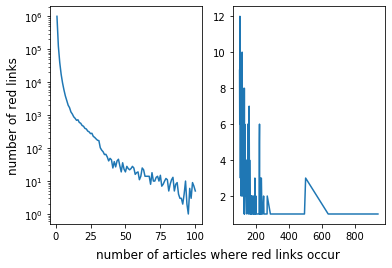

In [33]:
#ax = plt.gca()
ax = plt.subplot(121)
plt.semilogy(df_count_by_count['count'][:100], df_count_by_count['in_count'][:100])
plt.ylabel("number of red links", fontsize = 12)
#plt.xlabel("number of articles where red links occur")
ax.set_xlabel("number of articles where red links occur", fontsize = 12)
ax.xaxis.set_label_coords(1.1, -0.11)

plt.subplot(122)
plt.plot(df_count_by_count['count'][100:], df_count_by_count['in_count'][100:])
#plt.xlabel("number of articles where red links occur")

## Scripts stats

In [36]:
all_uk_redlinks_unique = all_uk_redlinks_with_parent_ids[['red_link_name']]

In [38]:
all_uk_redlinks_unique.head()

,red_link_name
0,Географія розвитку
1,Географія часу
3,Туристична географія
4,рентгенівська спектроскопія поглинання
5,рентгенівська фото електронна спектроскопія


In [43]:
ad = AlphabetDetector()

In [41]:
def get_scripts(x):
    x_set = ad.detect_alphabet(str(x))
    x_list = list(x_set)
    x_string = ' '.join(x_list)
    return x_string

In [44]:
all_uk_redlinks_unique['red_link_name_script_list_joined'] = all_uk_redlinks_with_parent_ids['red_link_name'].apply(lambda x: get_scripts(x))

In [46]:
all_uk_redlinks_unique.head()

,red_link_name,red_link_name_script_list_joined
0,Географія розвитку,CYRILLIC
1,Географія часу,CYRILLIC
3,Туристична географія,CYRILLIC
4,рентгенівська спектроскопія поглинання,CYRILLIC
5,рентгенівська фото електронна спектроскопія,CYRILLIC


In [45]:
all_uk_redlinks_unique['red_link_name_script_list_joined'].unique()

array(['CYRILLIC', 'LATIN', 'CYRILLIC LATIN', 'GREEK', '', 'CJK',
       'GREEK CYRILLIC', 'CYRILLIC GREEK', 'CYRILLIC MODIFIER',
       'HIRAGANA CJK', 'ARABIC', 'GREEK LATIN', 'KATAKANA',
       'HIRAGANA KATAKANA-HIRAGANA', 'KATAKANA KATAKANA-HIRAGANA',
       'KATAKANA CJK', 'HIRAGANA',
       'HIRAGANA KATAKANA CJK KATAKANA-HIRAGANA', 'HALFWIDTH',
       'CYRILLIC CJK', 'KATAKANA CJK KATAKANA-HIRAGANA',
       'CJK IDEOGRAPHIC', 'MASCULINE LATIN', 'CYRILLIC MASCULINE LATIN',
       'CYRILLIC MICRO', 'MICRO LATIN', 'CYRILLIC GREEK LATIN',
       'GREEK CYRILLIC LATIN', 'CYRILLIC MASCULINE', 'HANGUL',
       'CYRILLIC CJK LATIN', 'CYRILLIC HANGUL LATIN', 'ARMENIAN',
       'MODIFIER LATIN', 'CYRILLIC MODIFIER LATIN',
       'HIRAGANA KATAKANA LATIN', 'CYRILLIC HIRAGANA CJK',
       'HIRAGANA KATAKANA KATAKANA-HIRAGANA', 'FEMININE LATIN',
       'KATAKANA KATAKANA-HIRAGANA LATIN', 'CJK LATIN',
       'KATAKANA LATIN KATAKANA-HIRAGANA', 'GEORGIAN'], dtype=object)

In [47]:
cyrillic_scripts = ['CYRILLIC', 'CYRILLIC MODIFIER', 'MASCULINE CYRILLIC']

latin_scripts = ['LATIN', 'LATIN MASCULINE', 'LATIN MICRO', 'LATIN MODIFIER', 'LATIN FEMININE']

greek_scripts = ['GREEK']

cjk_scripts = ['CJK',
               'HIRAGANA CJK',
               'KATAKANA',
               'KATAKANA-HIRAGANA HIRAGANA',
               'KATAKANA-HIRAGANA KATAKANA',
               'KATAKANA CJK',
               'HIRAGANA',
               'KATAKANA-HIRAGANA KATAKANA HIRAGANA CJK',
               'HANGUL',
               'KATAKANA-HIRAGANA KATAKANA CJK',
               'IDEOGRAPHIC CJK',
               'KATAKANA-HIRAGANA KATAKANA HIRAGANA']

arabic_scripts = ['ARABIC']

armenian_scripts = ['ARMENIAN']

georgian_scripts = ['GEORGIAN']

mixed_scripts = ['mixed',
                 'LATIN CYRILLIC',
                 'LATIN MASCULINE CYRILLIC',
                 'MICRO CYRILLIC',
                 'LATIN CYRILLIC MODIFIER',
                 'GREEK CYRILLIC',
                 'LATIN GREEK',
                 'CYRILLIC CJK',
                 'LATIN GREEK CYRILLIC',
                 'LATIN CYRILLIC CJK',
                 'LATIN CYRILLIC HANGUL',
                 'LATIN KATAKANA HIRAGANA',
                 'LATIN KATAKANA-HIRAGANA KATAKANA',
                 'LATIN CJK',
                 'KATAKANA-HIRAGANA LATIN KATAKANA',
                 'CYRILLIC HIRAGANA CJK']

number_scripts = ['number', '']

symbol_scripts = ['symbol', 'HALFWIDTH']

In [53]:
all_scripts = [cyrillic_scripts, latin_scripts, greek_scripts, cjk_scripts,
               arabic_scripts, armenian_scripts, georgian_scripts,
               mixed_scripts, number_scripts, symbol_scripts]

In [48]:
def calculate_script_stats(script_list, df, column_name):
    len_s = 0
    for s in script_list:
        len_s += len(df[df[column_name]==s])
        script_perc = len_s/len(df)
    print(script_list[0], len_s)
    print('script_perc', script_list[0], script_perc)

In [55]:
for s in all_scripts:
    calculate_script_stats(s, all_uk_redlinks_unique, 'red_link_name_script_list_joined')
    print()

CYRILLIC 810953
script_perc CYRILLIC 0.6584259865189412

LATIN 388409
script_perc LATIN 0.31535561123497347

GREEK 88
script_perc GREEK 7.144863736081724e-05

CJK 2120
script_perc CJK 0.001721262627328779

ARABIC 22
script_perc ARABIC 1.786215934020431e-05

ARMENIAN 4
script_perc ARMENIAN 3.247665334582602e-06

GEORGIAN 2
script_perc GEORGIAN 1.623832667291301e-06

mixed 117
script_perc mixed 9.499421103654111e-05

number 586
script_perc number 0.0004757829715163512

symbol 1
script_perc symbol 8.119163336456505e-07



## Distribution of metrics results

In [56]:
with_gt_df = pd.read_csv(PATH_TO_DATA + 'ukredlinks_pairs_final.csv')

In [57]:
with_gt_df.head()

,Unnamed: 0,red_link_cand,ground truth,concur_score,pair_unique_id,red_link_name,candidate,true_label,BN_results,jaccard_score,levenstein_score
0,0,Panolis flammea Batrachedra praeangusta,Pine beauty,0.02369,6585,Panolis flammea,Batrachedra praeangusta,False,0,0.014,0.826
1,1,Panolis flammea Argyresthia conjugella,Pine beauty,0.02734,6441,Panolis flammea,Argyresthia conjugella,False,0,0.017,0.818
2,2,Panolis flammea Wittia sororcula,Pine beauty,0.02767,5053,Panolis flammea,Wittia sororcula,False,0,0.004,0.875
3,3,Panolis flammea Speckled wood (butterfly),Pine beauty,0.02197,7390,Panolis flammea,Speckled wood (butterfly),False,0,0.012,0.880
4,4,Panolis flammea Nemophora fasciella,Pine beauty,0.02425,7042,Panolis flammea,Nemophora fasciella,False,0,0.004,0.737


In [58]:
with_gt_df.shape

(2890926, 11)

## Distribution for Jaccard scores on incoming links

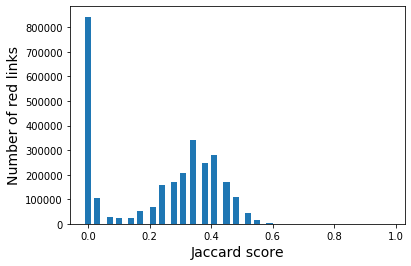

In [59]:
# define number of bins and round its values
bins_j = np.linspace(0,1,30).tolist()
bins_j = list(map(lambda x: round(x, 2), bins_j))

# get number of scores in each bin and indexes of scores in each bin
indexes = [[] for _ in range(len(bins_j)-1)]

for index in range(with_gt_df.shape[0]):
    for b in range(len(bins_j)-1):
        score = with_gt_df['jaccard_score'][index]
        if score < bins_j[b+1]:
            indexes[b].append(index)
            break
            
number_of_scores_in_bin = list(map(lambda x: len(x), indexes))

# plot Jaccard score distribution
plt.bar(bins_j[:-1], number_of_scores_in_bin, width=0.02, align='center')
plt.xlabel('Jaccard score', fontsize=14)
plt.ylabel('Number of red links', fontsize=14)
#plt.title('Jaccard score distribution', fontsize=14)
plt.show()

### plot distribution of true values

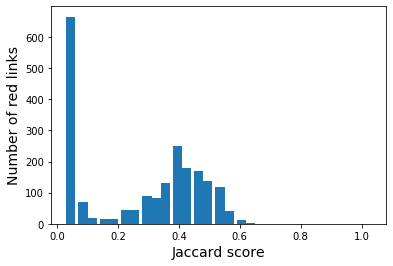

In [60]:
# get a number of true values in each bin
trues_all = []
for i in indexes:
    trues = list(map(lambda x: with_gt_df['true_label'][x], i))
    trues_all.append(trues)

truess = list(map(lambda x: x.count(True), trues_all))

# plot distribution of true values
plt.bar(bins_j[1:], truess, width=0.03, align='edge')
plt.xlabel('Jaccard score', fontsize=14)
plt.ylabel('Number of red links', fontsize=14)
#plt.title('Distribution of true values for Jaccard score distribution')
plt.show()

### plot relative distribution for Jaccard scores on incoming links

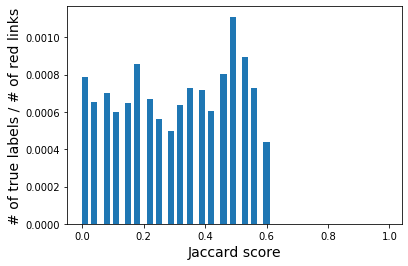

In [62]:
plt.bar(bins_j[:-1], np.array(truess) / np.array(number_of_scores_in_bin), width=0.02, align='edge')
plt.xlabel('Jaccard score', fontsize=14)
plt.ylabel('# of true labels / # of red links', fontsize=14)
#plt.title('Fraction of true labels for Jaccard distribution')
plt.show()

## Distribution for Levenstein scores

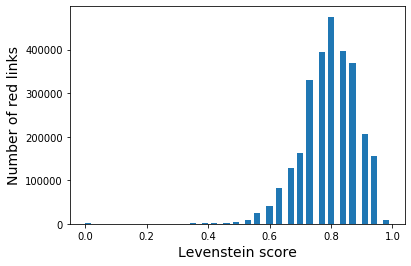

In [63]:
# define number of bins and round its values
bins = np.linspace(0,1,30).tolist()
bins = list(map(lambda x: round(x, 2), bins))

indexes_ld = [[] for _ in range(len(bins)-1)]

for index in range(with_gt_df.shape[0]):
    for b in range(len(bins)-1):
        score = with_gt_df['levenstein_score'][index]
        if score < bins[b+1]:
            indexes_ld[b].append(index)
            break
            
number_of_scores_in_bin_ld = list(map(lambda x: len(x), indexes_ld))

# get a number of true values in each bin
trues_all_ld = []
for i in indexes_ld:
    trues = list(map(lambda x: with_gt_df['true_label'][x], i))
    trues_all_ld.append(trues)

truess_ld = list(map(lambda x: x.count(True), trues_all_ld))

# plot Levenstein score distribution
plt.bar(bins[:-1], number_of_scores_in_bin_ld, width=0.02, align='edge')
plt.xlabel('Levenstein score', fontsize=14)
plt.ylabel('Number of red links', fontsize=14)
#plt.title('Levenstein score distribution')
plt.show()

### plot distribution of true values

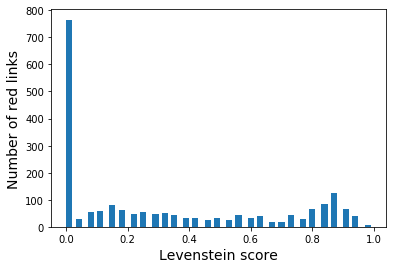

In [64]:
plt.bar(bins[:-1], truess_ld, width=0.02, align='edge')
plt.xlabel('Levenstein score', fontsize=14)
plt.ylabel('Number of red links', fontsize=14)
#plt.title('Distribution of true values for Levenstein score distribution')
plt.show()

### plot relative distribution for Levenshtein scores

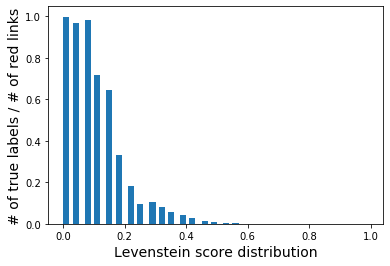

In [65]:
plt.bar(bins[:-1], np.array(truess_ld) / np.array(number_of_scores_in_bin_ld), width=0.02, align='edge')
plt.xlabel('Levenstein score distribution', fontsize=14)
plt.ylabel('# of true labels / # of red links', fontsize=14)
#plt.title('Fraction of true labels for Levenstein distribution')
plt.show()

## Distribution for Jaccard scores on concurrent links

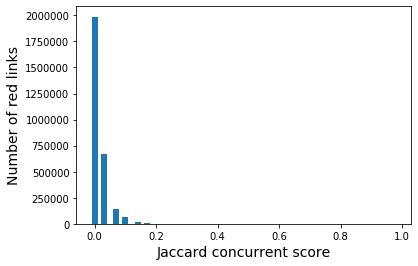

In [66]:
# define number of bins and round its values
bins_j = np.linspace(0,1,30).tolist()
bins_j = list(map(lambda x: round(x, 2), bins_j))

# get number of scores in each bin and indexes of scores in each bin
indexes = [[] for _ in range(len(bins_j)-1)]

for index in range(with_gt_df.shape[0]):
    for b in range(len(bins_j)-1):
        score = with_gt_df['concur_score'][index]
        if score < bins_j[b+1]:
            indexes[b].append(index)
            break
            
number_of_scores_in_bin = list(map(lambda x: len(x), indexes))

# plot Jaccard score distribution
plt.bar(bins_j[:-1], number_of_scores_in_bin, width=0.02, align='center')
plt.xlabel('Jaccard concurrent score', fontsize=14)
plt.ylabel('Number of red links', fontsize=14)
#plt.title('Jaccard concurrent score distribution')
plt.show()

### plot distribution of true values

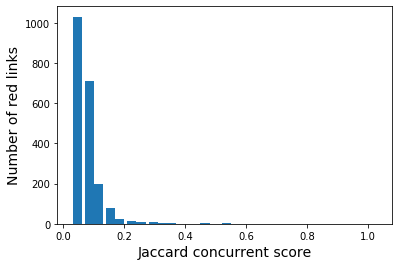

In [67]:
# get a number of true values in each bin
trues_all = []
for i in indexes:
    trues = list(map(lambda x: with_gt_df['true_label'][x], i))
    trues_all.append(trues)

truess = list(map(lambda x: x.count(True), trues_all))

# plot distribution of true values
plt.bar(bins_j[1:], truess, width=0.03, align='edge')
plt.xlabel('Jaccard concurrent score', fontsize=14)
plt.ylabel('Number of red links', fontsize=14)
#plt.title('Distribution of true values for Jaccard concurrent score distribution')
plt.show()

### plot relative distribution for Levenshtein scores

/home/andrii/virtenvs/tb/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


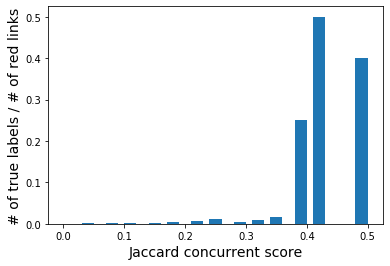

In [68]:
plt.bar(bins_j[:-1], np.array(truess) / np.array(number_of_scores_in_bin), width=0.02, align='edge')
plt.xlabel('Jaccard concurrent score', fontsize=14)
plt.ylabel('# of true labels / # of red links', fontsize=14)
#plt.title('Fraction of true labels for Jaccard concurrent distribution')
plt.show()